<a href="https://colab.research.google.com/github/bbouya/MIT_Amazon_recommendation_Product/blob/main/Amazon_Recommendation_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Recommendation Systems**
# Context : 

Online E-commerce website like Amazon, Flipkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering. which scales to massive data sets and produces hight-quality recommendations in real-time.

## Objective:
Build a recommendation system to recommend products to customers based on the their previous ratings for other products.

## Dataset Atrributes 



*   USER_ID : Every user identified with a unique id.
*   product_ID : Every product identified with a unique id.
*   Rating
*   Timestamp : Time of the rating (ignore this column for this exe)








In [9]:
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

import scipy.sparse 
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [10]:
#Read and import the data set
df = pd.read_csv('/content/sample_data/ratings_Electronics.csv', header =None)
df.columns = ['user_id','prod_id','rating','prod_name']
df = df.drop('prod_name', axis = 1)
df_copy = df.copy(deep = True)


In [11]:
#See few rows of the dataset
print(df.head())

          user_id     prod_id  rating
0   AKM1MP6P0OYPR  0132793040     5.0
1  A2CX7LUOHB2NDG  0321732944     5.0
2  A2NWSAGRHCP8N5  0439886341     1.0
3  A2WNBOD3WNDNKT  0439886341     3.0
4  A1GI0U4ZRJA8WN  0439886341     1.0


In [12]:
#check the number of rows and columns in data
rows, columns = df.shape
print('No of rows : ',rows)
print('No of column:', columns)

No of rows :  592494
No of column: 3


In [15]:
#check the data type
df.dtypes

user_id     object
prod_id     object
rating     float64
dtype: object

In [17]:
#check for missing values present
print('number of missing values', df.isna().sum())

number of missing values user_id    0
prod_id    1
rating     1
dtype: int64


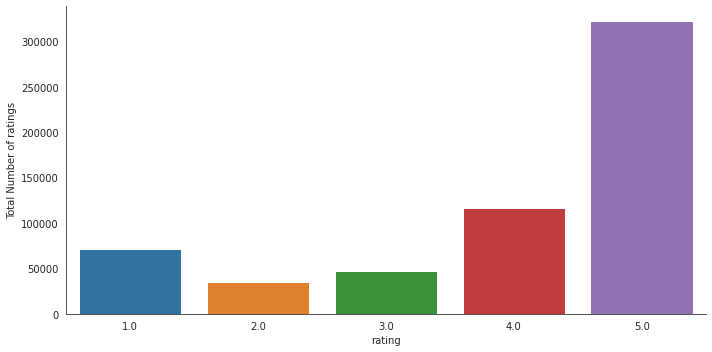

In [18]:
#lets check the rating distribution  of the ratings 
with sns.axes_style('white'):
  g = sns.factorplot('rating', data = df, aspect = 2.0, kind = 'count')
  g.set_ylabels("Total Number of ratings")

In [20]:
# Number of unique user id and product id in the data
print('Number of unique USERS in RAW data = ', df['user_id'].nunique())
print('Number of unique ITEMS in RAW data = ', df['prod_id'].nunique())

Number of unique USERS in RAW data =  471497
Number of unique ITEMS in RAW data =  36409


In [22]:
# Top 10 users based on rating 
most_rated = df.groupby('user_id').size().sort_values(ascending = False)[:10]
most_rated

user_id
A5JLAU2ARJ0BO     343
A231WM2Z2JL0U3    248
A25HBO5V8S8SEA    161
AKT8TGIT6VVZ5      94
AT6CZDCP4TRGA      94
A2B7BUH8834Y6M     91
A11D1KHM7DVOQK     90
A6FIAB28IS79       87
A2AEZQ3DGBBLPR     79
AGHZXQL9F94T9      66
dtype: int64

### **Data Preparation as per Requirement on Number of minimum ratings**
# Let s take a subset of dataset(by only keeping the users who have given 50 or more number of rating) to make the dataset less sparse and easy to work with.


In [25]:
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 50].index
                                 )]

In [ ]:
print('The number d ')